C:\Users\Shahrukh Ansari\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # Remove the CWD from sys.path while we load stuff.


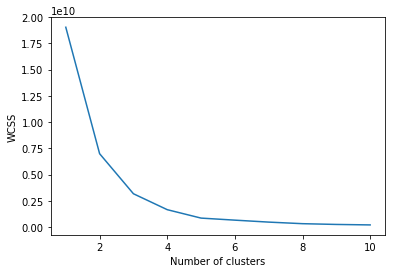

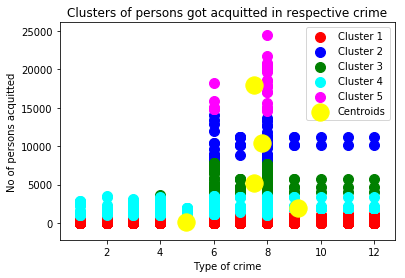

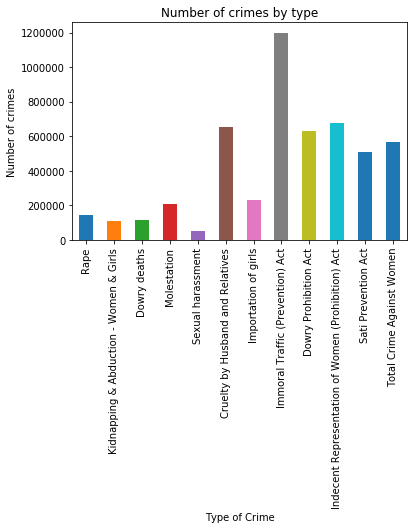

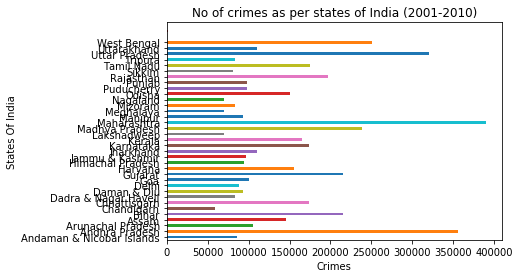

[2, 1, 2, 2, 3, 1, 2, 2, 2, 1]


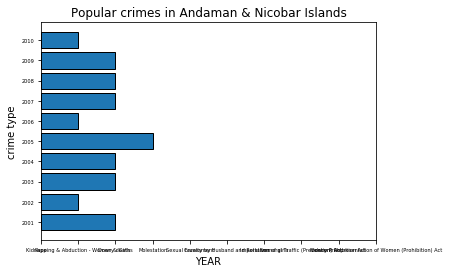

[2, 2, 2, 2, 2, 2, 2, 2, 6, 5]


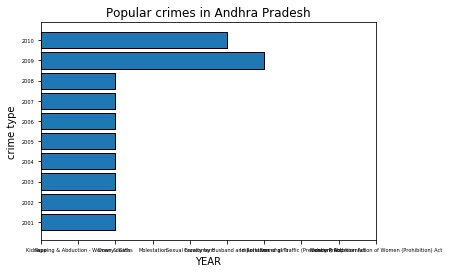

[2, 1, 2, 2, 2, 2, 2, 1, 1, 2]


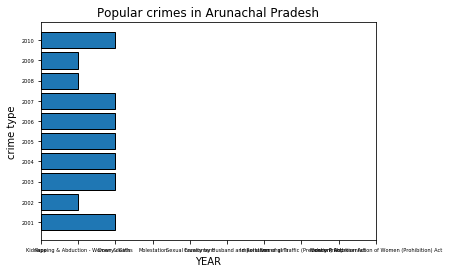

[2, 2, 2, 2, 2, 3, 2, 3, 2, 1]


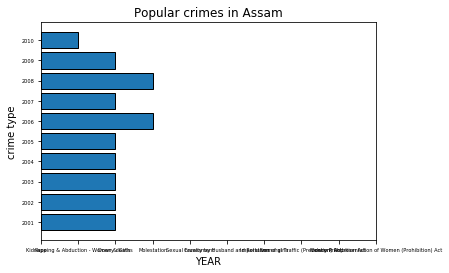

[2, 3, 3, 2, 2, 2, 2, 2, 2, 2]


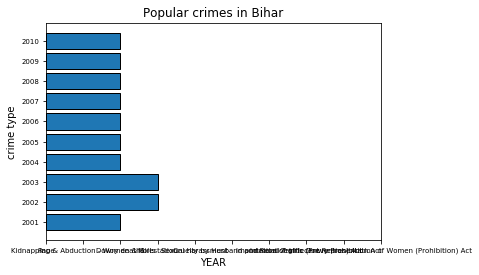

[2, 2, 2, 1, 1, 1, 2, 1, 1, 1]


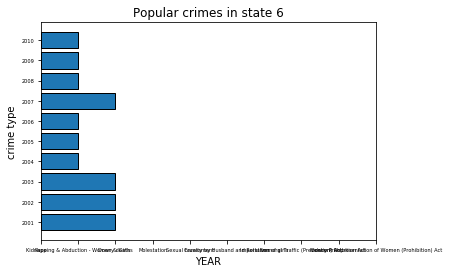

[4, 4, 3, 3, 3, 4, 5, 4, 4, 3]


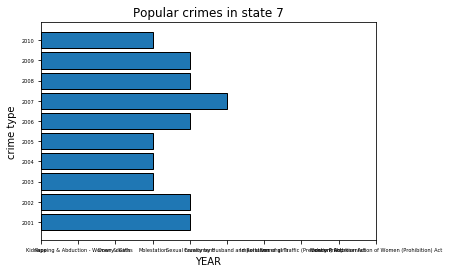

[2, 2, 2, 3, 2, 2, 1, 1, 2, 1]


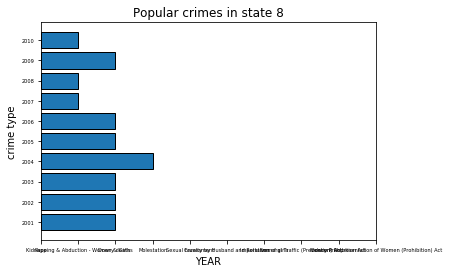

[2, 2, 2, 1, 1, 3, 2, 1, 2, 1]


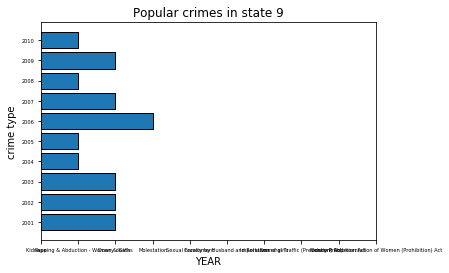

[2, 2, 2, 1, 1, 1, 1, 1, 1, 1]


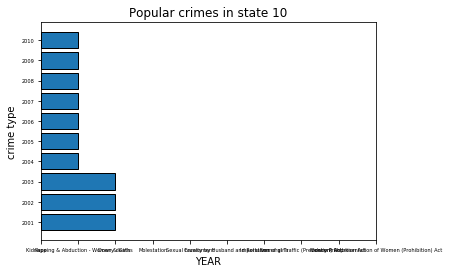

[3, 2, 2, 2, 1, 2, 3, 2, 3, 1]


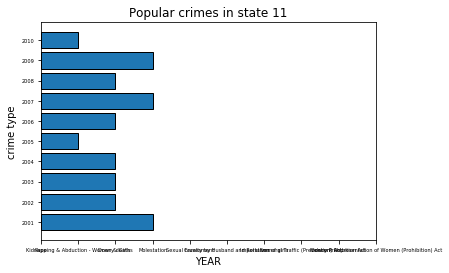

[2, 2, 2, 2, 1, 1, 2, 1, 2, 2]


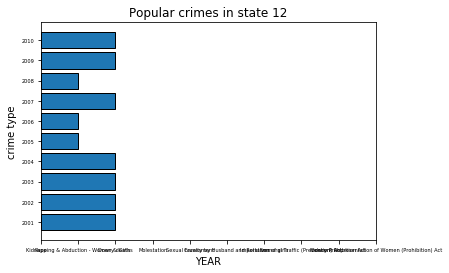

[1, 2, 2, 2, 2, 1, 1, 1, 1, 1]


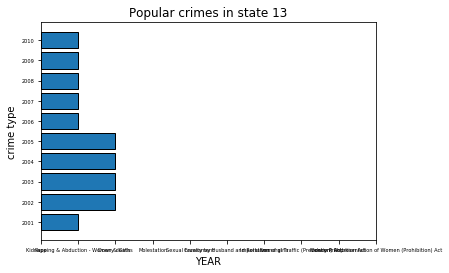

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


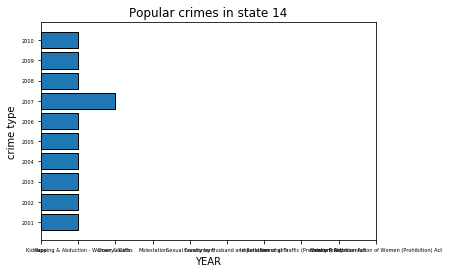

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


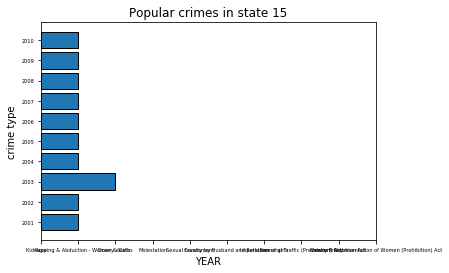

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


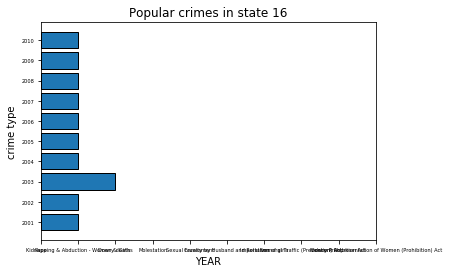

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


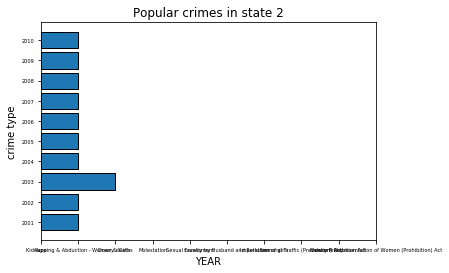

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


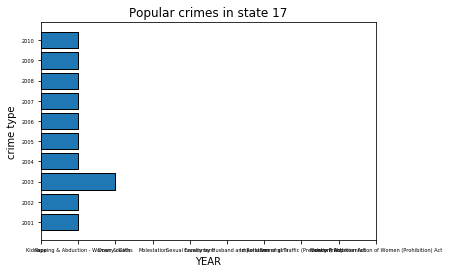

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


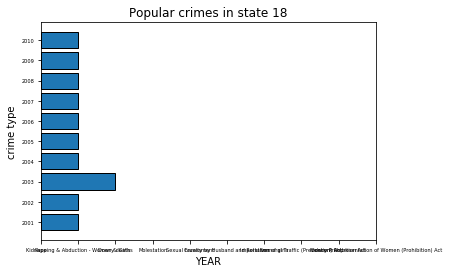

[1, 1, 2, 1, 1, 1, 1, 1, 1, 2]


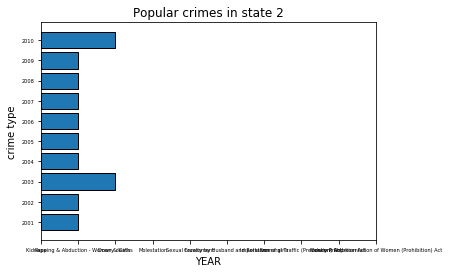

[2, 3, 2, 2, 1, 1, 1, 2, 2, 3]


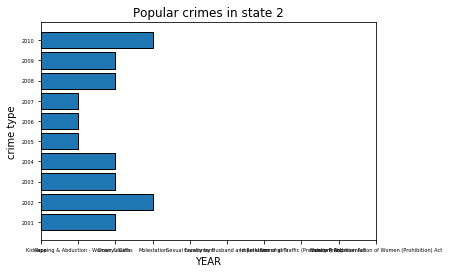

[2, 1, 2, 2, 2, 2, 2, 1, 2, 3]


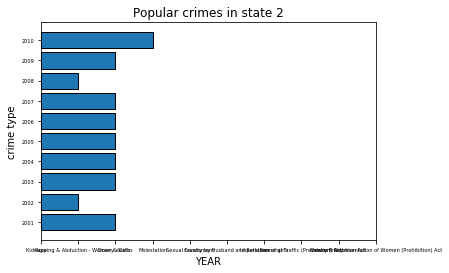

[1, 1, 2, 1, 1, 1, 1, 1, 1, 2]


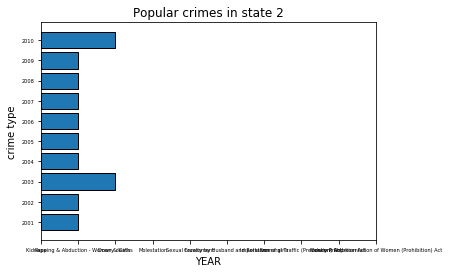

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


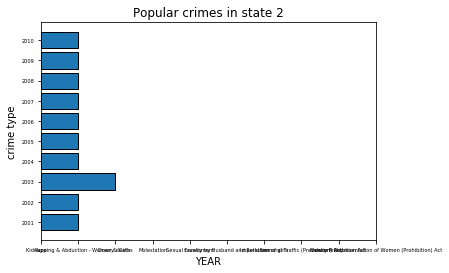

[2, 1, 2, 1, 1, 1, 1, 1, 1, 1]


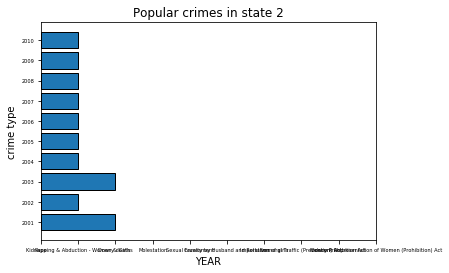

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


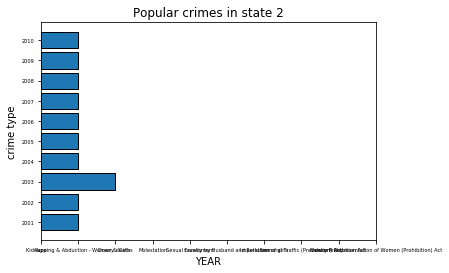

[1, 1, 2, 1, 1, 1, 1, 1, 1, 2]


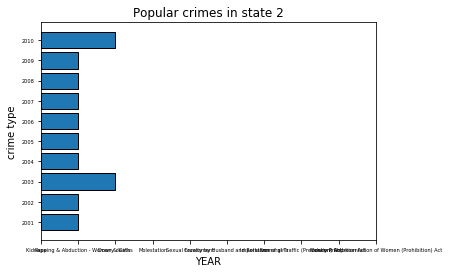

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


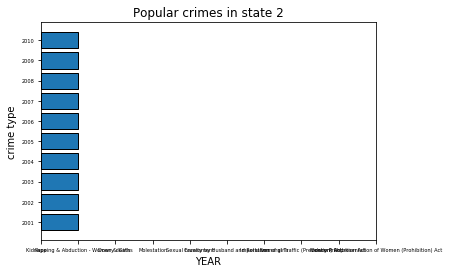

[1, 1, 2, 1, 1, 1, 1, 1, 1, 2]


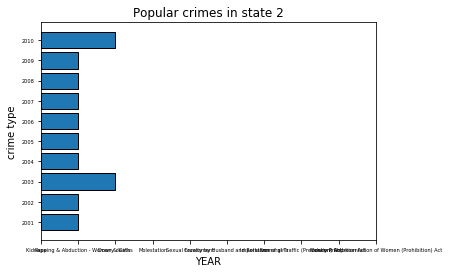

[2, 1, 2, 1, 2, 2, 2, 2, 1, 2]


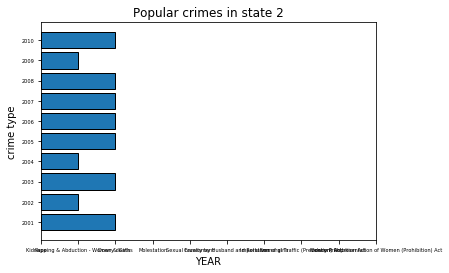

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


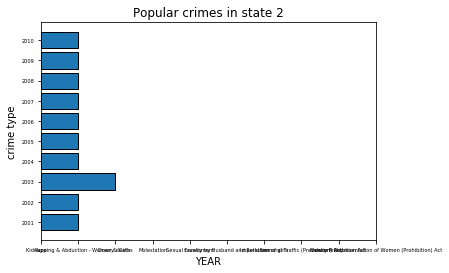

[1, 1, 2, 1, 2, 1, 1, 1, 1, 1]


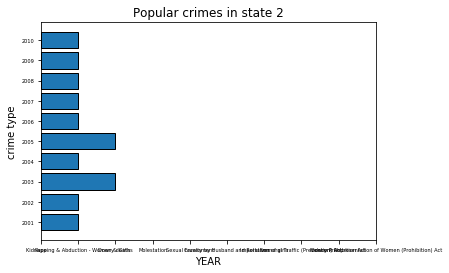

[1, 2, 2, 2, 2, 2, 1, 1, 1, 1]


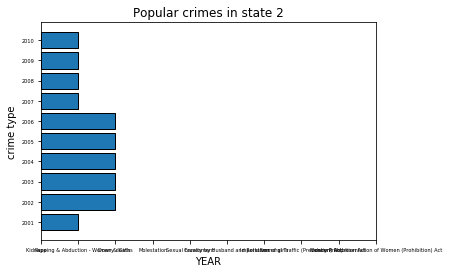

[1, 1, 2, 2, 2, 2, 1, 1, 1, 1]


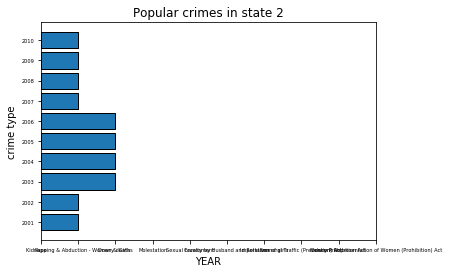

[1, 2, 2, 2, 2, 2, 2, 1, 1, 1]


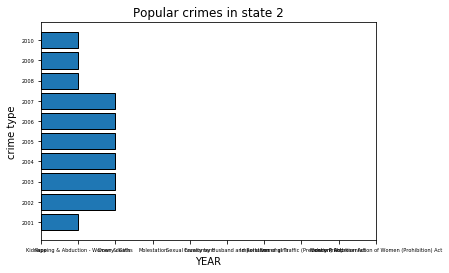

In [2]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('crimefil.csv')
data = pd.DataFrame.from_csv('crimefil.csv')

#print(np.array(data))
X = dataset.iloc[:, [2, 3]].values

# to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of persons got acquitted in respective crime')
plt.xlabel('Type of crime')
plt.ylabel('No of persons acquitted')
plt.legend()
plt.show()

#no of persons acquitted on the basis of crimes
dataa = data.groupby(["Group_Name"])['Persons'].sum().plot(kind='bar')
m=[]
label_crime = ['Rape','Kidnapping & Abduction - Women & Girls','Dowry deaths','Molestation','Sexual harassment','Cruelty by Husband and Relatives','Importation of girls','Immoral Traffic (Prevention) Act','Dowry Prohibition Act','Indecent Representation of Women (Prohibition) Act','Sati Prevention Act','Total Crime Against Women']
for i in range(0, len(label_crime)):
    m.append(data.groupby(["Group_Name"])['Persons'].sum())
#print(m)

index = np.arange(len(label_crime))
plt.title('Number of crimes by type')
plt.ylabel('Number of crimes')
plt.xlabel('Type of Crime')
plt.xticks(index, label_crime, fontsize=10)
plt.show()

#Statewise distribution of crime by their types, which crimes are most common among the top 20 most frequent crime types ?
dataa = data.groupby(["Area"])['Persons'].sum().plot(kind='barh')
m=[]
label = ['Andaman & Nicobar Islands','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu & Kashmir','Jharkhand','Karnataka','Kerala','Lakshadweep','Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha','Puducherry','Punjab','Rajasthan','Sikkim','Tamil Nadu','Tripura','Uttar Pradesh','Uttarakhand','West Bengal']

index = np.arange(len(label))
plt.title('No of crimes as per states of India (2001-2010)')
plt.xlabel('Crimes')
plt.ylabel('States Of India')
plt.yticks(index, label, fontsize=10)
plt.show()

#dataa = data.groupby(["Group_Name"])['Persons'].sum().plot(kind='bar')
#dataa = data.groupby(["Year"])['Group_Name'].value_counts().max().plot(kind='bar')
#print(data.groupby(["Year"])['Group_Name'].value_counts().max())
#dataa = data.groupby(["Year"])['Group_Name'].value_counts().plot(kind='bar')
#dataa = arr.groupby(["Year"])['Group_Name'].value_counts()

label_year = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
arr=data[data.Area==1]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)

index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in Andaman & Nicobar Islands')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==2]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in Andhra Pradesh')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==3]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in Arunachal Pradesh')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==4]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in Assam')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==5]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in Bihar')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=7)
plt.xticks(index, label_crime, fontsize=7)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==6]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 6')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==7]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 7')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==8]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 8')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==9]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 9')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==10]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 10')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==11]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 11')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==12]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 12')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==13]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 13')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==14]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 14')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==15]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 15')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==16]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 16')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==17]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==18]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 17')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==19]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 18')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==20]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==21]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==22]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==23]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==24]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==25]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==26]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==27]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==28]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==29]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==30]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==31]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==32]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==33]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==34]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

# FOR THE NEXT STATE-------------------------------------------------------
arr=data[data.Area==35]
yr=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
yrmax=[]
for i in range(len(yr)):
    yrmax.append(arr[arr.Year == yr[i]]['Group_Name'].value_counts().max())
print(yrmax)
index = np.arange(len(label_year))
plt.barh(index, yrmax,edgecolor='black')
plt.title('Popular crimes in state 2')
plt.xlabel('YEAR')
plt.ylabel('crime type')
plt.yticks(index,label_year, fontsize=5)
plt.xticks(index, label_crime, fontsize=5)
plt.show()

